# Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [26]:
#load the required packages

%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from numba import jit          # to import parallel computing features and just in time compilated code

In [27]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place your ID ("numero di matricola") that will be used as seed for random generator. You can try to change the seed to see the impact of the randomization.

In [28]:
ID = 1205459
np.random.seed(ID)

In [29]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

Now split into training and test. Make sure that each label is present at least 10 times
in training frequencies.

In [30]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [45 45 48 54 58 51 40 46 48 65]


In [31]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


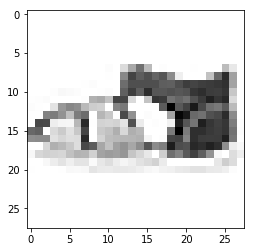

LABEL: 5
INPUT:


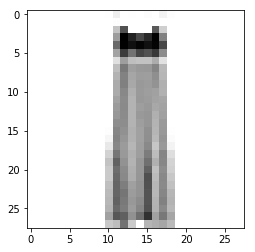

LABEL: 3
INPUT:


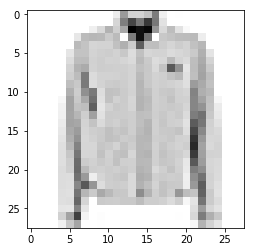

LABEL: 4


In [32]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a Feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using the GridSearchCV with cv=5.


In [43]:
parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (75,), (100,), (100, 100,), (100, 100, 100,)]}

#parameters = {'hidden_layer_sizes': [(100,), (100, 100,), (100, 100, 100,)]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE

#fitter = GridSearchCV(mlp, parameters, return_train_score=True, cv=5)
fitter = GridSearchCV(mlp, parameters, cv=5)


fitter.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(fitter.best_params_, "\n")

print("Score with best parameters:")
#ADD YOUR CODE
print(fitter.best_score_, "\n")

print("All scores on the grid:")
#ADD YOUR CODE
print(fitter.cv_results_['mean_train_score'])

/home/tommaso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)} 

Score with best parameters:
0.7832 

All scores on the grid:
[0.42144381 0.86112278 0.53980752 0.76545483 0.84554982 0.87188123
 0.82133506 0.63684338]


/home/tommaso/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### QUESTION 1

What do you observe for different architectures and their scores? How the nummber of layers and their sizes affect the performances?

One can notice that the results depends a lot on the choice of parameters: the best score is obtained with a single layer and 100 neurons, while bigger nets sometimes give worse results (for example (50, 50) is still better w.r.t. (50,) but (100, 100,) and (100, 100, 100,) become worse w.r.t. (100,) ).

### TO DO 2

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations

In [34]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_fitter = GridSearchCV(mlp, {'hidden_layer_sizes':[(100,)]}, return_train_score=True, cv=5, verbose=True, n_jobs=4)

best_fitter.fit(X_train, y_train)

training_error = 1.-best_fitter.score(X_train, y_train)
test_error = 1.-best_fitter.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.1s finished
/home/tommaso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.210437


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [35]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1010, 1034,  954,  982, 1008, 1032,  984, 1001,  974, 1021]))

## TO DO 3

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [36]:
#for NN we try the same architectures as before
#parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}
parameters = {'hidden_layer_sizes': [(10,), (50,), (75,), (100,), (10,10,), (50,50,), (100, 100,), (50, 50, 50,), (100, 100, 100,)]}


#ADD YOUR CODE
def f():
    fitter_f = GridSearchCV(mlp, parameters, return_train_score=True, cv=5, n_jobs=4)
    fitter_f.fit(X_train, y_train)
    
    return fitter_f

mlp_large_CV = f()

print ('\nRESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_CV.best_params_)

print("Score with best parameters:")
print(mlp_large_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_CV.cv_results_['mean_test_score'])

/home/tommaso/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (100,)}
Score with best parameters:
0.8437

All scores on the grid:
[0.6041 0.7901 0.8375 0.8437 0.563  0.7772 0.6964 0.7943 0.7598]


## QUESTION 2
Describe your architecture choices and the results you observe with respect to the layers and sizes used.

My choices were made to analyze better the case of 1 layer NN and then try to explore multi-layers NN (without doing extreme things).

The scores "have a maximum" around the architecture with 75 neurons with 1 layer. For other layers architectures, it seems that those with 2 layers are generally better w.r.t. those with 3 layers. Furthermore, for 2 layers architectures, the maximum is achieved with the (100, 100,) architecture.

## TO DO 4

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations. 


In [37]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
"""
mlp = MLPClassifier(max_iter=100, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
"""

training_error = 1.-mlp_large_CV.score(X_train, y_train)
test_error = 1.-mlp_large_CV.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.139260


## QUESTION 3

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

### Results for 500 training clothes:

Best fitter: (100,)

Best NN training error: 0.038200

Best NN test error: 0.139100

### Results for 10000 training clothes:

Best fitter: (100, 100,)

Best NN training error: 0.036300

Best NN test error: 0.146060

### TO DO 5

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

In [38]:
# preparing predicted sets
NN_prediction = best_fitter.predict(X_test)
large_NN_prediction = mlp_large_CV.predict(X_test)

In [39]:
# printing their shapes to check if they are equal
print(NN_prediction.shape)
print(large_NN_prediction.shape)

(50000,)
(50000,)


0 False 2
1 False 5
2 False 0
3 False 1
4 False 2
5 False 1
6 False 9
7 False 3
8 False 5
9 True 0
INPUT:


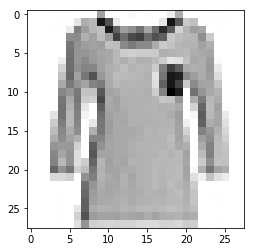

LABEL: 0
SVM prediction:  6
Logistic prediction:  0


In [40]:
#ADD YOUR CODE

i = 0
found = False
while found==False:
    if (NN_prediction[i] != y_test[i] and (large_NN_prediction[i] == y_test[i])):
        found = True
    print(i, found, large_NN_prediction[i])
    i += 1


plot_input(X_test,y_test,i-1)
print("SVM prediction: ", NN_prediction[i-1])
print("Logistic prediction: ", large_NN_prediction[i-1])

### ADD CODE TO SEARCH AND VISUALIZE

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large" , you could need to replace with your variable names.



Weights with 500 data points:


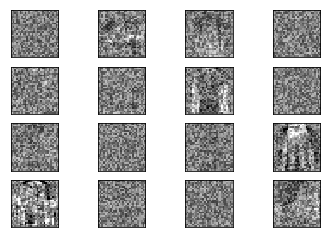

Weights with 10000 data points:


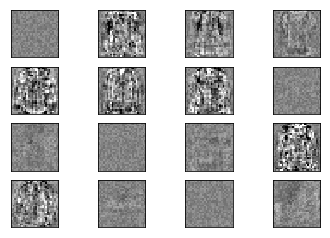

In [41]:
print("Weights with 500 data points:")

# TO REPLACE:
mlp = best_fitter.best_estimator_
best_mlp_large = mlp_large_CV.best_estimator_

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

Some "picture weights" becomes "irrelevant" (they are mainly almost uniform grey) while others becomes "more datailed".

I think those more detailed becomes more useful while fitting parameters.

### TO DO 7

Report the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores.

In [42]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook
# Best fitter:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

# Create the SVM and perform the fit

#ADD YOUR CODE
best_SVM = SVC(kernel='rbf', C=100.0, gamma=0.001)
best_SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM', "\n")

SVM_training_error = 1.-best_SVM.score(X_train, y_train)

print("Training error SVM:")
print(SVM_training_error, "\n")

SVM_test_error = 1.-best_SVM.score(X_test, y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM 

Training error SVM:
0.038000000000000034 

Test error SVM:
0.1542


## QUESTION 5
Compare the results of SVM and of NN. Which one would you preferer? Which are its tradeoffs?

### RESULTS FOR BEST NN

Best NN training error: 0.036300

Best NN test error: 0.146060

### RESULTS FOR SVM 

Training error SVM: 0.038000000000000034

Test error SVM: 0.1542

##### It seems that the NN has better results w.r.t the SVM: maybe this is due to the fact that the NN has a larger set of parameters that can fit better the data and their "small deifferences". (It is not perfect and the huge set of parameters compared with that of the SVM lead to a "small" improvement of the results...)